<a href="https://colab.research.google.com/github/Pavankumargr2004/Basic-Ml-Projects/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependices


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

importing the california dataset


In [47]:



# Load the data
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # This gives a pandas DataFrame with features and target
print(housing)
# View the data
print(df.head())

{'data':        MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns], 'target': 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    

In [11]:
df['price']=housing.target

In [12]:
print(df.head())

   MedInc  HouseAge  AveRooms  ...  Longitude  MedHouseVal  price
0  8.3252      41.0  6.984127  ...    -122.23        4.526  4.526
1  8.3014      21.0  6.238137  ...    -122.22        3.585  3.585
2  7.2574      52.0  8.288136  ...    -122.24        3.521  3.521
3  5.6431      52.0  5.817352  ...    -122.25        3.413  3.413
4  3.8462      52.0  6.281853  ...    -122.25        3.422  3.422

[5 rows x 10 columns]


In [16]:
#checking the number of rows and columns
df.shape

(20640, 10)

In [18]:
#cheeck for missing values and count
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0
price,0


In [ ]:
#statistical measure of the datasets

In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


understanding the correlation between the various features
1.positive correlation
2.negative correlation

In [21]:
corelation=df.corr()

<Axes: >

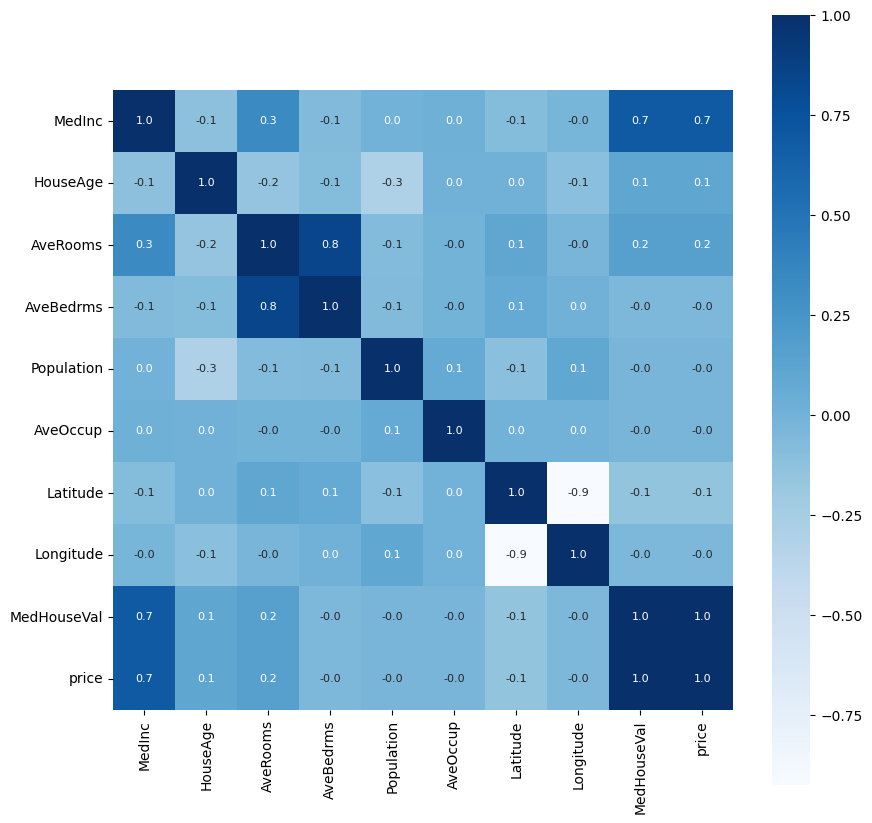

In [30]:
#constructing the heat map for understanding the correlation
plt.figure(figsize=(10,10))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [31]:
#splitting data and target
X=df.drop(columns='price',axis=1)
Y=df['price']

In [32]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0      8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1      8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2      7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3      5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4      3.8462      52.0  6.281853  ...     37.85    -122.25        3.422
...       ...       ...       ...  ...       ...        ...          ...
20635  1.5603      25.0  5.045455  ...     39.48    -121.09        0.781
20636  2.5568      18.0  6.114035  ...     39.49    -121.21        0.771
20637  1.7000      17.0  5.205543  ...     39.43    -121.22        0.923
20638  1.8672      18.0  5.329513  ...     39.43    -121.32        0.847
20639  2.3886      16.0  5.254717  ...     39.37    -121.24        0.894

[20640 rows x 9 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635   

In [33]:
#splitting the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 9) (16512, 9) (4128, 9)


model training
XGBoost Regressor


In [36]:
model=XGBRegressor()

In [37]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

*Evaluation*

In [41]:
#accuracy on training data
prediction_on_train=model.predict(X_train)
print(prediction_on_train)

[0.7217324 2.7355433 0.5786305 ... 1.9222438 1.5352833 0.8096097]


In [42]:
#squared error
score_1=metrics.r2_score(Y_train,prediction_on_train)
#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,prediction_on_train)
print("R squared error:",score_1)   #lesser the value more the accuracy
print("Mean absolute error:",score_2)

R squared error: 0.9999843708817635
Mean absolute error: 0.0032788743486385345


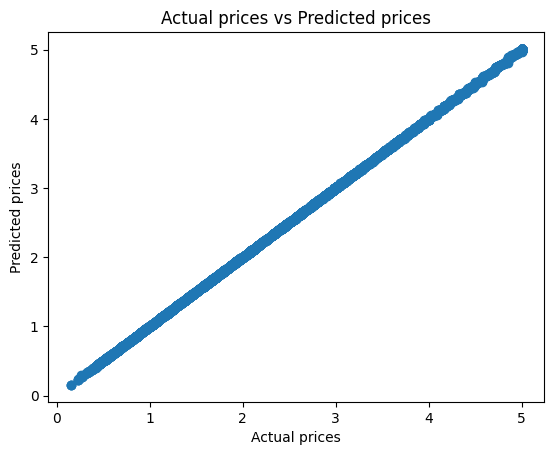

In [45]:
#visualizing the actual prices and predicted prices
plt.scatter(Y_train,prediction_on_train)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [43]:
#on the test data
prediction_on_test=model.predict(X_test)
print(prediction_on_test)

[2.7792728  2.0662043  0.96131444 ... 1.7631863  0.77990687 2.3611808 ]


In [44]:
#squared error
score_1=metrics.r2_score(Y_test,prediction_on_test)
#mean absolute error
score_2=metrics.mean_absolute_error(Y_test,prediction_on_test)
print("R squared error:",score_1)   #lesser the value more the accuracy
print("Mean absolute error:",score_2)

R squared error: 0.999929603126291
Mean absolute error: 0.0051191317554730815
